In [10]:
# libraries 
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 

In this notebook we will work with a mobility dataset and we will perform some basic analysis on the mobility of people during the Pandemic.


Why is Mobility important? Viruses spread with people: understanding where and how much people move can help us understand the spread of diseases.

Questions we can answer with Mobility Data:
- To what extent the mobility of people was affected by COVID-19 spread and restrictive measures (lockdowns, curfews, etc)?
- How much mobility reductions affect the epidemic? ($R_t$ reduction, etc)
- When do people react to spread of a new virus? Do they anticipate governmental measures?
- Are there geopgraphical heterogeneities in mobility reductions?
- Do mobility reductions correlate with socio-economic and demographic indicators?
- Can we use mobility to predict the evolution of the epidemic in the short-term? (cases will go up, down, etc)
- Can we use mobility data to inform an epidemiological model? (e.g., SIR model with varying contacts patterns)

# Google Mobility Report

First, we import the data from the Google Mobility Report (Global CSV): 

https://www.google.com/covid19/mobility/

In [11]:
df = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv")
#df = pd.read_csv("../data/Global_Mobility_Report.csv")
print("Columns:", df.columns.values)
print("\nCountries:", df.country_region.unique())
df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Columns: ['country_region_code' 'country_region' 'sub_region_1' 'sub_region_2'
 'metro_area' 'iso_3166_2_code' 'census_fips_code' 'place_id' 'date'
 'retail_and_recreation_percent_change_from_baseline'
 'grocery_and_pharmacy_percent_change_from_baseline'
 'parks_percent_change_from_baseline'
 'transit_stations_percent_change_from_baseline'
 'workplaces_percent_change_from_baseline'
 'residential_percent_change_from_baseline']

Countries: ['United Arab Emirates' 'Afghanistan' 'Antigua and Barbuda' 'Angola'
 'Argentina' 'Austria' 'Australia' 'Aruba' 'Bosnia and Herzegovina'
 'Barbados' 'Bangladesh' 'Belgium' 'Burkina Faso' 'Bulgaria' 'Bahrain'
 'Benin' 'Bolivia' 'Brazil' 'The Bahamas' 'Botswana' 'Belarus' 'Belize'
 'Canada' 'Switzerland' "Côte d'Ivoire" 'Chile' 'Cameroon' 'Colombia'
 'Costa Rica' 'Cape Verde' 'Czechia' 'Germany' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Estonia' 'Egypt' 'Spain' 'Finland' 'Fiji'
 'France' 'Gabon' 'United Kingdom' 'Georgia' 'Ghana' 'Greece' 'Guatemala'
 '

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


The report provides mobility changes to specific locations:
- 'retail_and_recreation_percent_change_from_baseline'
- 'grocery_and_pharmacy_percent_change_from_baseline'
- 'parks_percent_change_from_baseline'
- 'transit_stations_percent_change_from_baseline'
- 'workplaces_percent_change_from_baseline'
- 'residential_percent_change_from_baseline

We focus on Turkey:

In [12]:
df_tr = df.loc[df.country_region == "Turkey"].reset_index(drop=True)
df_tr.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-15,2.0,3.0,-11.0,-4.0,7.0,1.0
1,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-16,7.0,6.0,14.0,2.0,5.0,0.0
2,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-17,6.0,5.0,10.0,5.0,8.0,-2.0
3,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-18,4.0,6.0,11.0,4.0,8.0,-2.0
4,TR,Turkey,NaN,NaN,NaN,NaN,NaN,ChIJcSZPllwVsBQRKl9iKtTb2UA,2020-02-19,0.0,3.0,6.0,0.0,9.0,-2.0


We check the geographical resolution:

In [13]:
print("Subregion level 1:", df_tr.sub_region_1.unique())

print("\nSubregion level 2:", df_tr.sub_region_2.unique())

Subregion level 1: [nan 'Adana' 'Adıyaman' 'Afyonkarahisar' 'Ağrı' 'Aksaray' 'Amasya'
 'Ankara' 'Antalya' 'Ardahan' 'Artvin' 'Aydın' 'Balıkesir' 'Bartın'
 'Batman' 'Bayburt' 'Bilecik' 'Bingöl' 'Bitlis' 'Bolu' 'Burdur' 'Bursa'
 'Çanakkale' 'Çankırı' 'Çorum' 'Denizli' 'Diyarbakır' 'Düzce' 'Edirne'
 'Elazığ' 'Erzincan' 'Erzurum' 'Eskişehir' 'Gaziantep' 'Giresun'
 'Gümüşhane' 'Hakkari' 'Hatay' 'Iğdır' 'Isparta' 'İstanbul' 'İzmir'
 'Kahramanmaraş' 'Karabük' 'Karaman' 'Kars' 'Kastamonu' 'Kayseri' 'Kilis'
 'Kırıkkale' 'Kırklareli' 'Kırşehir' 'Kocaeli' 'Konya' 'Kütahya' 'Malatya'
 'Manisa' 'Mardin' 'Mersin' 'Muğla' 'Muş' 'Nevşehir' 'Niğde' 'Ordu'
 'Osmaniye' 'Rize' 'Sakarya' 'Samsun' 'Şanlıurfa' 'Siirt' 'Sinop' 'Sivas'
 'Şırnak' 'Tekirdağ' 'Tokat' 'Trabzon' 'Tunceli' 'Uşak' 'Van' 'Yalova'
 'Yozgat' 'Zonguldak']

Subregion level 2: [nan 'Ceyhan' 'Çukurova' 'Kozan' 'Pozantı' 'Sarıçam' 'Seyhan' 'Yüreğir'
 'Adıyaman Merkez' 'Besni' 'Gölbaşı' 'Kâhta' 'Afyonkarahisar Merkez'
 'Bolvadin' 'Çay' 'Dinar

We focus on subregion level 1 and we want to see how mobility changed to different locations (work, stores, etc):

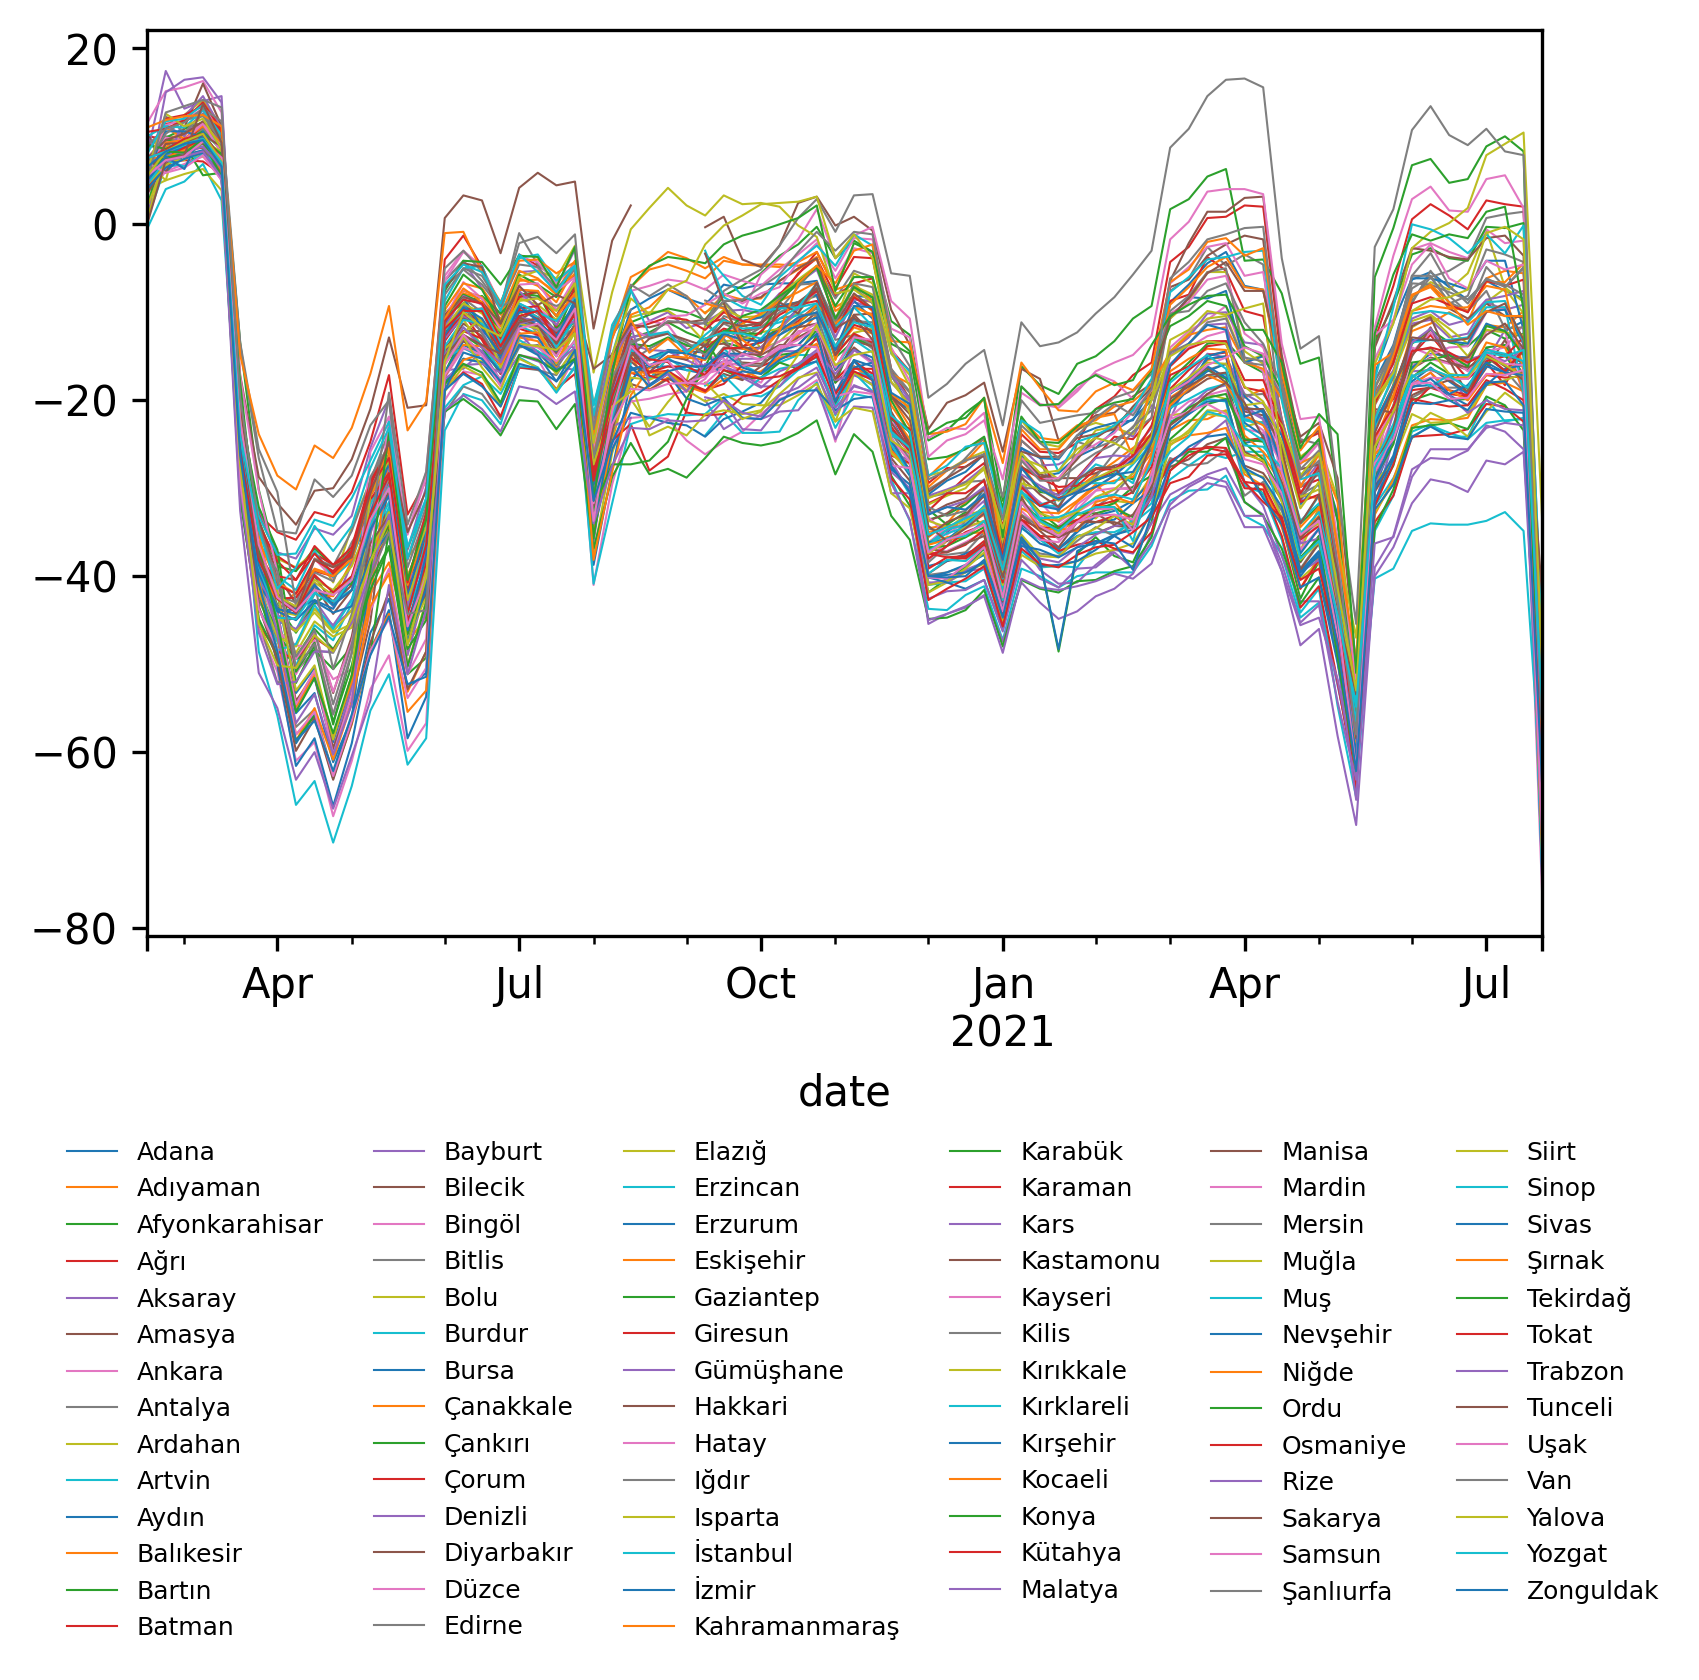

In [14]:
# name of the column 
col = 'workplaces_percent_change_from_baseline'

# cast date column to datetime object and set it to index
df_tr.index = pd.to_datetime(df_tr.date)

# get all subregion1 names (not None)
subregion1 = [r for r in df_tr.sub_region_1.unique() if pd.notnull(r)]

# plot
fig, ax = plt.subplots(dpi=300)

# iterate over subregion
for reg1 in subregion1:
    
    # loc data for this subregion
    df_temp = df_tr.loc[(df_tr.sub_region_1 == reg1) & (df_tr.sub_region_2.isnull())]
    
    # plot (resample and do weekly average)
    df_temp[col].resample("W").mean().plot(ax=ax, label=reg1, linewidth=0.5)

ax.legend(ncol=6, frameon=False, bbox_to_anchor=[1.1,-0.2,0,0], fontsize=6)

To get a better idea of the data we can rank regions according to their maximum mobility change observed during the first wave:

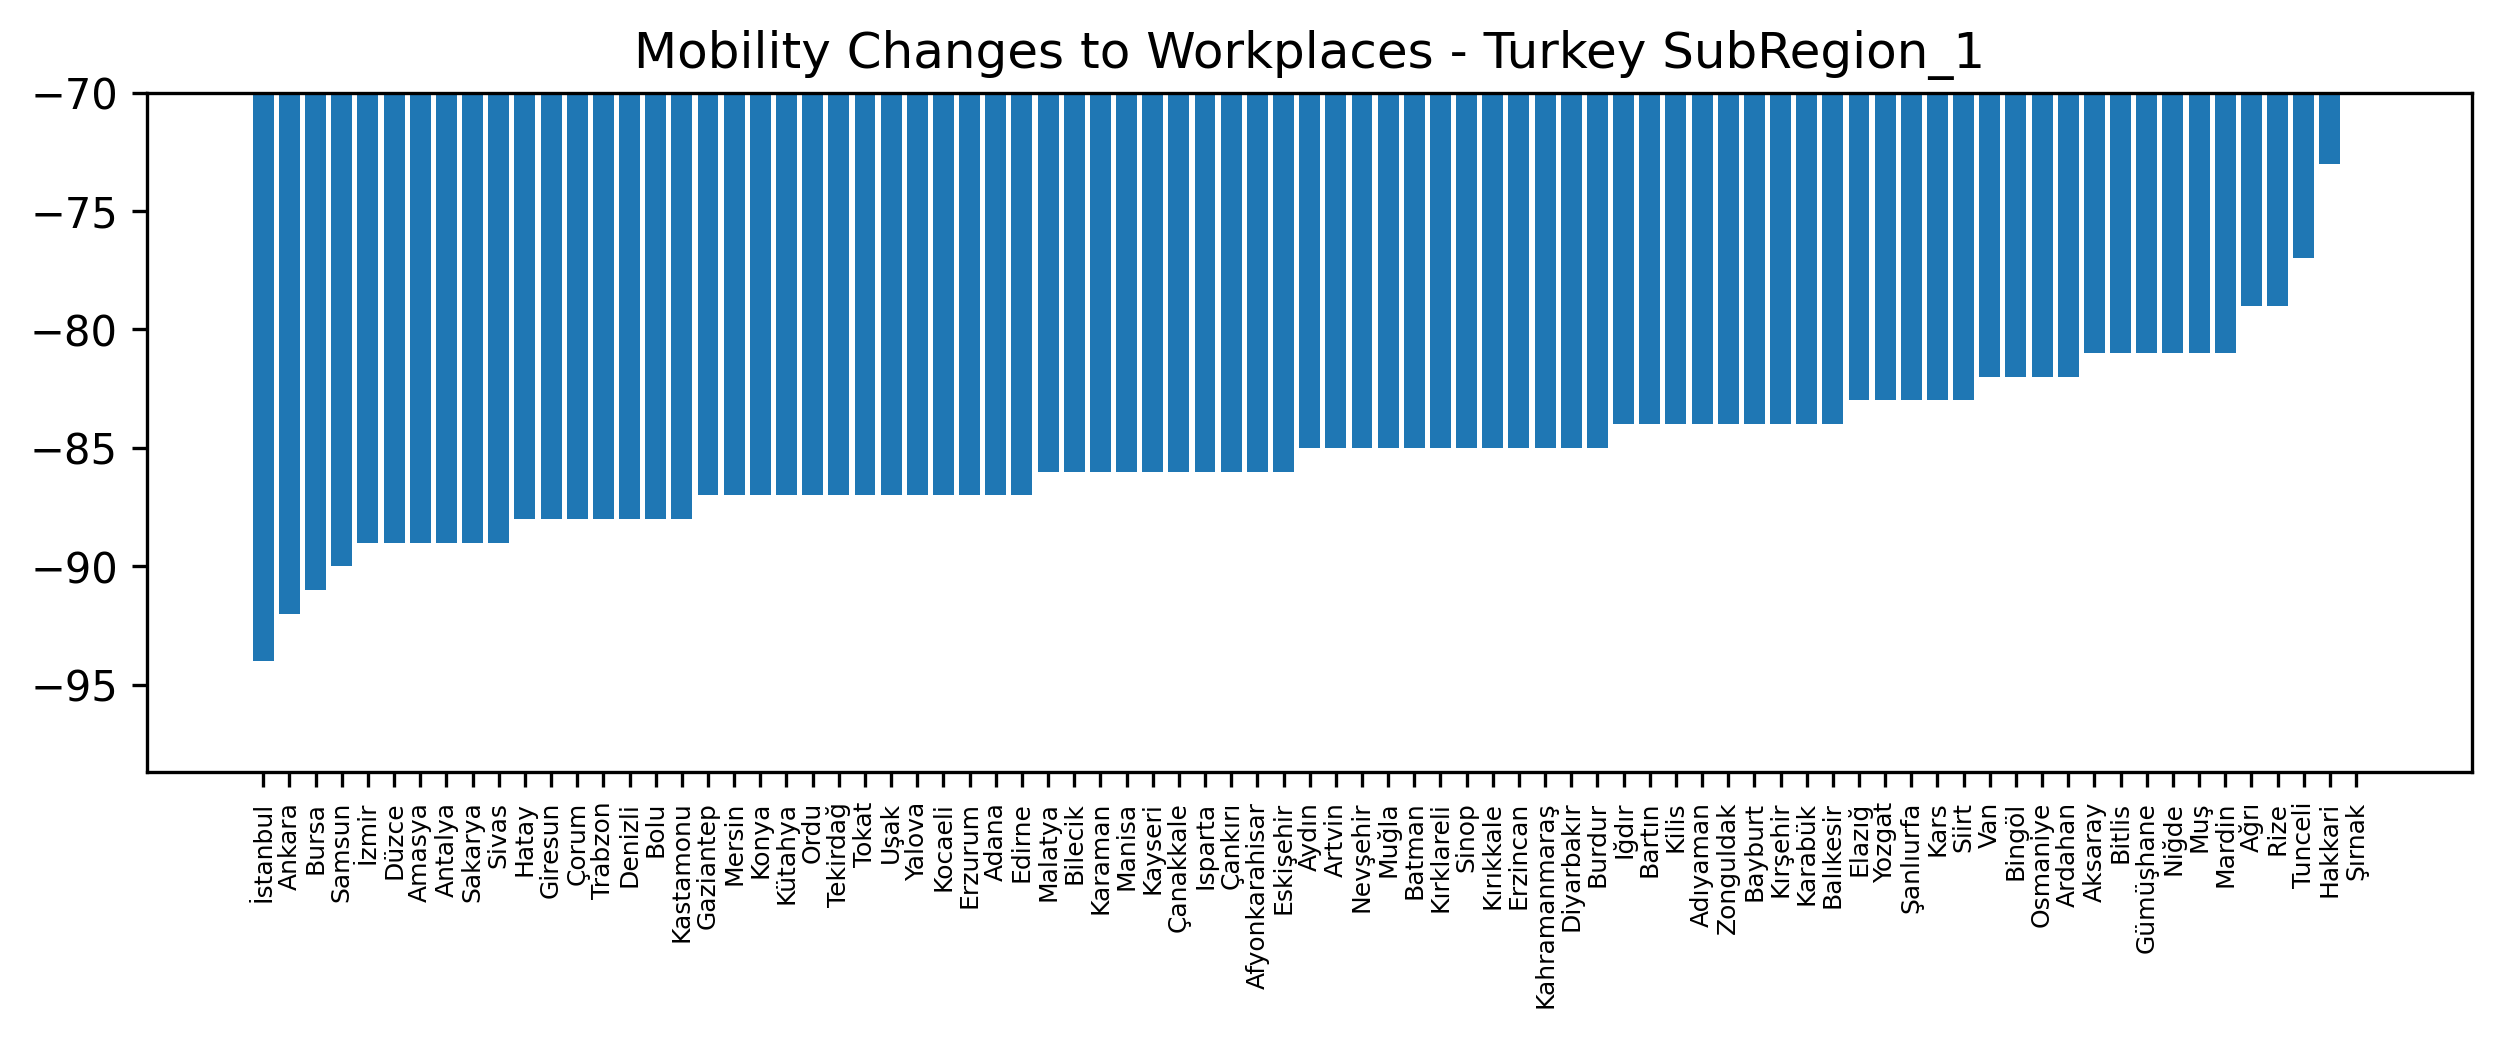

In [17]:
df_tr_1wave = df_tr.loc[df_tr.index <= datetime(2020, 7, 1)]

# iterate over subregion
mob_changes = np.array([df_tr_1wave.loc[df_tr_1wave.sub_region_1 == reg1][col].min() for reg1 in subregion1])

# indexes that sort the mobility changes array
idxs = np.argsort(mob_changes)

# plot
fig, ax = plt.subplots(dpi=300, figsize=(10,3))
ax.bar(np.array(subregion1)[idxs], mob_changes[idxs])
ax.set_xticks(range(len(subregion1)))
ax.set_xticklabels(np.array(subregion1)[idxs], rotation=90, fontsize=6)
ax.set_ylim(ymax=-70)

ax.set_title("Mobility Changes to Workplaces - Turkey SubRegion_1");

Of course, this can be easily extended to other places and mobility destinations:

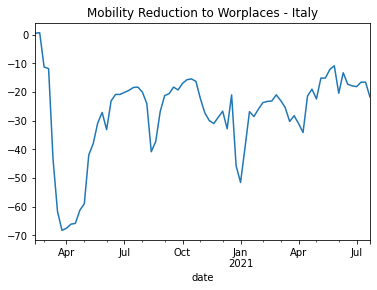

In [18]:
# other country
df_ita = df.loc[(df.country_region == "Italy") & (df.sub_region_1.isnull())]
df_ita.index = pd.to_datetime(df_ita.date)
fig, ax = plt.subplots()
df_ita[col].resample("W").mean().plot(title="Mobility Reduction to Worplaces - Italy", ax=ax);

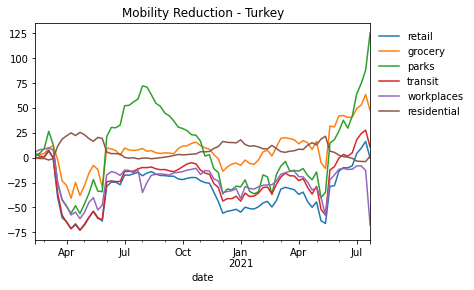

In [19]:
# other mobility destinations
df_tr_national = df_tr.loc[df_tr.sub_region_1.isnull()]
fig, ax = plt.subplots()
df_tr_national['retail_and_recreation_percent_change_from_baseline'].resample("W").mean().plot(label='retail', ax=ax)
df_tr_national['grocery_and_pharmacy_percent_change_from_baseline'].resample("W").mean().plot(label='grocery', ax=ax)
df_tr_national['parks_percent_change_from_baseline'].resample("W").mean().plot(label='parks', ax=ax)
df_tr_national['transit_stations_percent_change_from_baseline'].resample("W").mean().plot(label='transit', ax=ax)
df_tr_national['workplaces_percent_change_from_baseline'].resample("W").mean().plot(label='workplaces', ax=ax)
df_tr_national['residential_percent_change_from_baseline'].resample("W").mean().plot(label='residential', ax=ax)

ax.set_title("Mobility Reduction - Turkey")
ax.legend(frameon=False, bbox_to_anchor=[1,1,0,0])